## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
#Задача 1. Подберите скорость обучения (alpha) и количество итераций.

#Дана обучающая выборка: 10 примеров репетиторов и их числовая характеристика "Cтаж работы";
#На основе этой обучающей выборки нужно научиться прогнозировать кол-во баллов ученика репетитора за сданный экзамен;

In [3]:
#Стаж работы вместе с единичным вектором задаем матрицей X
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [4]:
#баллы за экзамен - переменная y
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Параметры линейной модели, полученные методом МНК: [45.0625  3.8125]
Значение MSE в точке минимума: 43.96874999999999


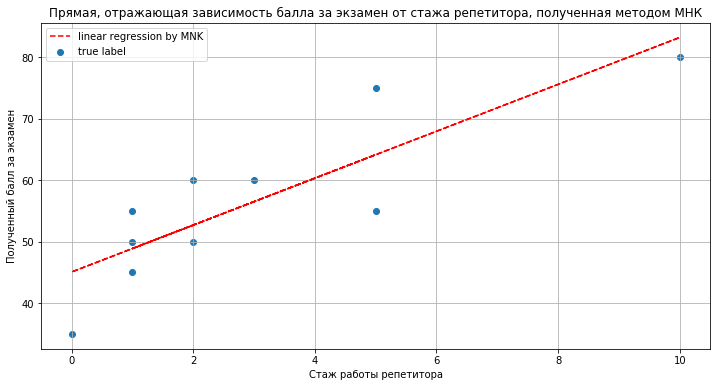

In [13]:
#Для начала найдем параметры линейной модели методом МНК.
#Значение функции среднеквадратичного отклонения MSE в точке найденного минимума будем считать базовым значением для подбора
#скорости обучения и количества итераций.

w_mnk = np.linalg.inv(np.dot(X, X.T)) @ X @ y
y_pred = np.dot(X.T, w_mnk)

plt.figure(figsize = (12,6))
plt.scatter(X[1], y, label = 'true label')
plt.plot(X[1], y_pred, '--', color = 'red', label = 'linear regression by MNK')
plt.xlabel('Стаж работы репетитора')
plt.ylabel('Полученный балл за экзамен')
plt.legend()
plt.grid()
plt.title('Прямая, отражающая зависимость балла за экзамен от стажа репетитора, полученная методом МНК')

def mse(y, y_pred):
    return (sum((y - y_pred)**2)) / len(y)

print('Параметры линейной модели, полученные методом МНК:', w_mnk)
print('Значение MSE в точке минимума:', mse(y, y_pred))

In [7]:
#Теперь реализуем алгоритм градиентного спуска для разной скорости обучения alpha:

#скорость обучения
alpha = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

#рассчитанный вес для каждой итерации и каждой скорости итерации будем складывать в словарь w_list:
w_list = {}

#рассчитанный mse для каждой итерации и каждой скорости итерации будем складывать в словарь mse_list:
mse_list = {}

iter_num = 1
for a in alpha: 
    iter_num = 1
    
    #зададим начальную точку весов:
    w = np.zeros(w_mnk.shape)
    
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    #спуск будет продолжаться до тех пор, пока мы не достигнем сходимости весов, под сходимостью будем понимать l2-норму
    #отклонения весов, полученных на i-ом шаге от весов, полученных на предыдщуем шаге, меньше 1e-5:
    min_weight_dist = 1e-5
  
    while (weight_dist > min_weight_dist):
        new_w = w - 2 * a * np.dot(X, np.dot(w, X) - y)/ len(y)
        weight_dist = np.linalg.norm((new_w - w), ord = 2)
        y_pred = np.dot(X.T, new_w)
        if iter_num == 1:
            w_list[a] = [new_w]
            mse_list[a] = [mse(y, y_pred)]
        else:
            w_list[a].append(new_w)
            mse_list[a].append(mse(y, y_pred))
        iter_num += 1
        w = new_w

Text(0.5,1,'Cпуск продолжается до тех пор, пока мы не достигаем сходимости весов')

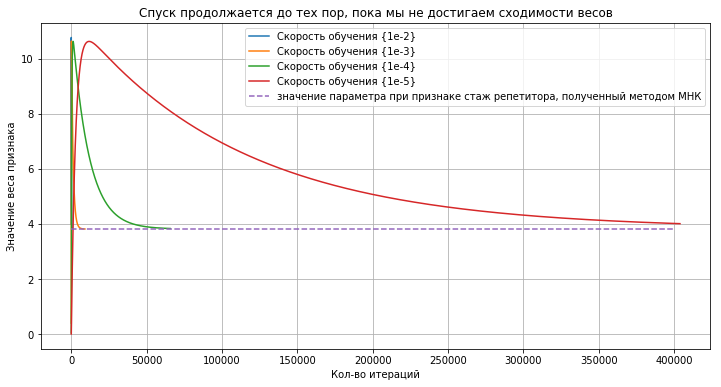

In [14]:
#Видим, как процесс спуска зависит от скорости обучения:

#1. Чем больше скорость обучения, тем быстрее мы достигаем целевых значений параметров линейной регрессии. Так, для скорости
#   обучения 0.01 нам потребовалось 998 итерация для достижения целевого значения mse с точностью до 5-го знака после запятой.
#   Для скорости 0.0001 потребовалось больше 50000 итераций.

#2. С другой стороны, скорость обучения не должна быть очень большой, иначе мы можем "перепрыгнуть" через минимум, так и не 
#   достигнув его.

plt.figure(figsize = (12,6))
plt.plot(range(len(np.array(w_list[1e-2])[:,1])), np.array(w_list[1e-2])[:,1], label = 'Скорость обучения {1e-2}')
plt.plot(range(len(np.array(w_list[1e-3])[:,1])), np.array(w_list[1e-3])[:,1], label = 'Скорость обучения {1e-3}')
plt.plot(range(len(np.array(w_list[1e-4])[:,1])), np.array(w_list[1e-4])[:,1], label = 'Скорость обучения {1e-4}')
plt.plot(range(len(np.array(w_list[1e-5])[:,1])), np.array(w_list[1e-5])[:,1], label = 'Скорость обучения {1e-5}')
plt.plot([0, 400000], [w_mnk[1],w_mnk[1]] , '--',label = 'значение параметра при признаке стаж репетитора, полученный методом МНК')
plt.xlabel('Кол-во итераций')
plt.ylabel('Значение веса признака')
plt.legend()
plt.grid()
plt.title('Cпуск продолжается до тех пор, пока мы не достигаем сходимости весов')

Параметры линейной модели, полученные методом МНК: [45.0625  3.8125]
Параметры линейной модели, полученные методом GB при скорости обучения 0.01: [45.06143958  3.81269229]


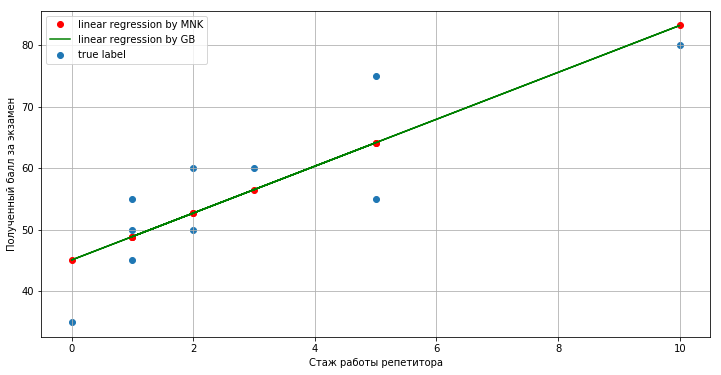

In [15]:
#Получившийся график предсказанного y по x с весами, полученными по методу градиентного спуска совпадает с графиком
#предсказания y с весами, полученными по методу МНК:
plt.figure(figsize = (12,6))
plt.scatter(X[1], y, label = 'true label')
plt.plot(X[1], np.dot(X.T, w_mnk), 'o', color = 'red', label = 'linear regression by MNK')
plt.plot(X[1], np.dot(X.T, w_list[1e-2][-1]), color = 'green', label = 'linear regression by GB')
plt.xlabel('Стаж работы репетитора')
plt.ylabel('Полученный балл за экзамен')
plt.legend()
plt.grid()


print('Параметры линейной модели, полученные методом МНК:', w_mnk)
print('Параметры линейной модели, полученные методом GB при скорости обучения 0.01:', w_list[1e-2][-1])

Text(0,0.5,'MSE')

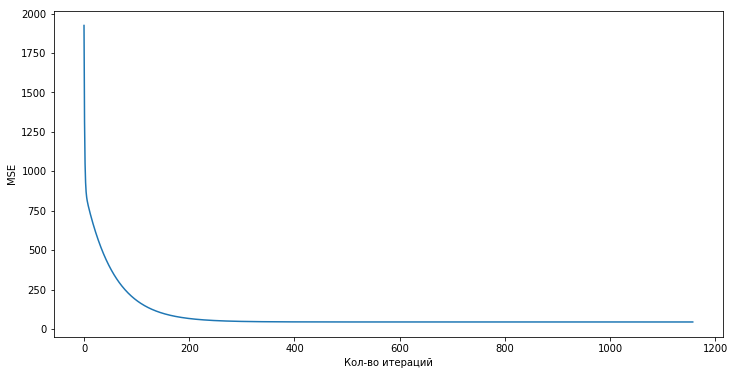

In [16]:
#Посмотрим на скорость снижения среднеквадратичной ошибки при градиентом спуске для разных скоростей обучения:

#1. Видим, что ошибка выходит на асимптоту, достаточно 600 итераций для скорости обучения 0.01 и достижения значения mse = 43.9 
plt.figure(figsize = (12,6))
plt.plot(range(len(np.array(w_list[1e-2])[:,1])), mse_list[1e-2])
plt.xlabel('Кол-во итераций')
plt.ylabel('MSE')

In [ ]:
#Задача 2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её:

In [17]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(1000):
    y_pred = np.dot(W, X)
    err = mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))
    W_pred = W
    if i % 50 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #150: W_new = [34.51273915  5.72553647], MSE = 97.36
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #250: W_new = [40.84211409  4.57780191], MSE = 52.51
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #350: W_new = [43.37415299  4.1186557 ], MSE = 45.34
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #450: W_new = [44.38708413  3.93497626], MSE = 44.19
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #550: W_new = [44.79230282  3.86149609], MSE = 44.0
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98
Iteration #650: W_new = [44.95440879  3.83210067], MSE = 43.97
Iteration #700: W_new = [44.99413322  3.82

In [ ]:
#Задача 3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию
#начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [23]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
mse_list = []
mse_current = np.inf

print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(1000):
    y_pred = np.dot(W, X)
    mse_now = mse(y, y_pred)
    if (mse_current - mse_now) > 0.0001:
        W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))
        W_pred = W
        if i % 50 == 0:
            print(f'Iteration #{i}: W_new = {W}, MSE = {round(mse_now,4)}')
        mse_current = mse_now
        i += 1
    else:
        break

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.5764
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.427
Iteration #150: W_new = [34.51273915  5.72553647], MSE = 97.3582
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.327
Iteration #250: W_new = [40.84211409  4.57780191], MSE = 52.513
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.3868
Iteration #350: W_new = [43.37415299  4.1186557 ], MSE = 45.3361
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.5158
Iteration #450: W_new = [44.38708413  3.93497626], MSE = 44.1876
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.0563
Iteration #550: W_new = [44.79230282  3.86149609], MSE = 44.0038
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.9828
Iteration #650: W_new = [44.95440879  3.83210067], MSE = 43.9744
